In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LOADING THE DATA
df=pd.read_csv(r"C:\Users\riya choudhary\OneDrive\Desktop\Python dataset\smart_city_data.csv")

#PREVIEW THE DATA
df.info()
print('\n',df.head())
print("\nShape of the data (rows, columns):",df.shape)
print("\nData types of columns:\n",df.dtypes)
print("\nDimension of the dataset:",df.ndim)

#SUMMARY STATISTICS
print("\nSummary Statistics:\n",df.describe())

#CHECKING FOR MISSING VALUES
print("\nMissing values:")
print(df.isnull().sum())

#CHECKING FOR DUPLICATES
print("\nDuplicate values:")
print(df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   City_State                           1500 non-null   object 
 1   Timestamp                            1500 non-null   object 
 2   Traffic_Congestion (%)               1500 non-null   int64  
 3   Avg_Vehicle_Speed (MPH)              1500 non-null   int64  
 4   PM2.5_Level (µg/m³)                  1500 non-null   float64
 5   CO2_Emissions (Metric Tons)          1500 non-null   float64
 6   Noise_Pollution (dB)                 1500 non-null   int64  
 7   Renewable_Energy (%)                 1500 non-null   float64
 8   Electricity_Consumption (MWh)        1500 non-null   float64
 9   Water_Consumption (Million Gallons)  1500 non-null   float64
 10  Temperature (°F)                     1500 non-null   float64
 11  Sensor_Reliability (0-1)      

In [3]:
#EXPLORING CATEGORICAL COLUMNS
# Unique values and frequency for each categorical column
print("\nTop Cities with Most Records:\n", df['City_State'].value_counts().head(10))
print("\nUnique Cities:", df['City_State'].nunique())

print("\nTraffic Incident Types:\n", df['Traffic_Incident'].value_counts())
print("\nUnique Traffic Incidents:", df['Traffic_Incident'].nunique())

print("\nWeather Conditions:\n", df['Weather_Condition'].value_counts())
print("\nUnique Weather Conditions:", df['Weather_Condition'].nunique())



Top Cities with Most Records:
 City_State
Houston, TX         174
Philadelphia, PA    168
Chicago, IL         161
Phoenix, AZ         153
San Jose, CA        152
Dallas, TX          151
New York, NY        151
San Antonio, TX     138
San Diego, CA       127
Los Angeles, CA     125
Name: count, dtype: int64

Unique Cities: 10

Traffic Incident Types:
 Traffic_Incident
Clear                333
Heavy Traffic        308
Event Nearby         300
Road Construction    294
Accident             265
Name: count, dtype: int64

Unique Traffic Incidents: 5

Weather Conditions:
 Weather_Condition
Snowy     323
Cloudy    304
Rainy     295
Sunny     291
Foggy     287
Name: count, dtype: int64

Unique Weather Conditions: 5


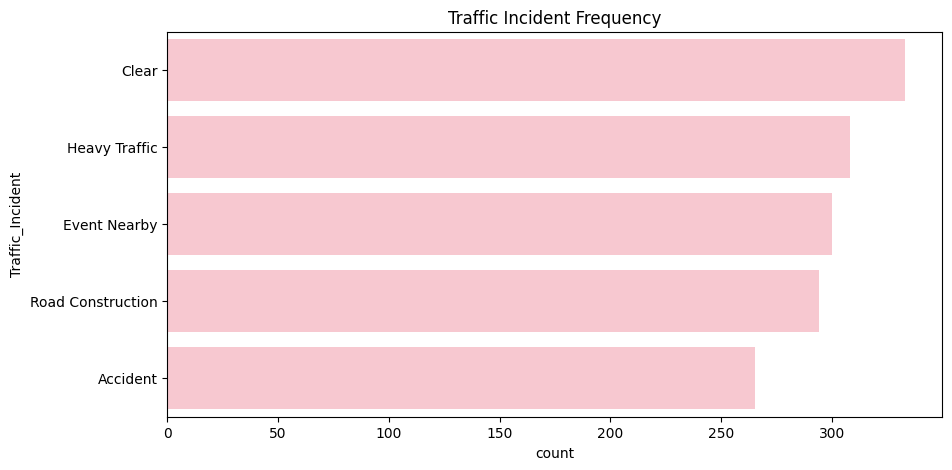

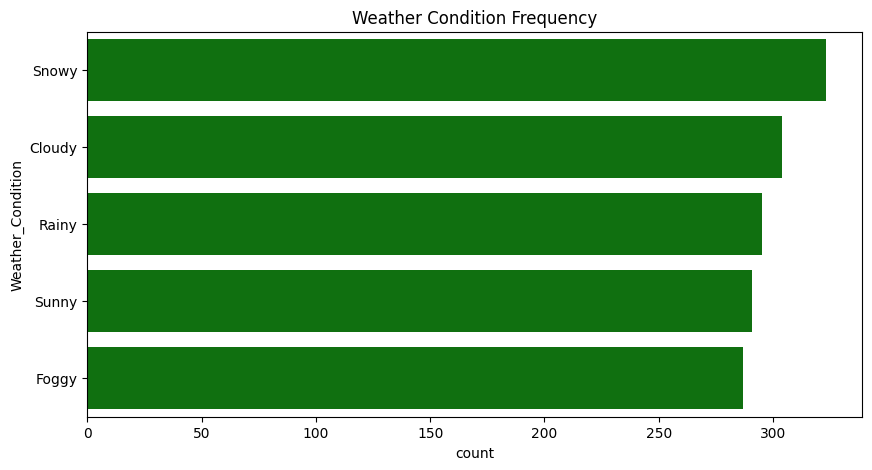

In [2]:
#VISUALIZING CATEGORICAL COLUMNS
# Traffic Incident Count Plot
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Traffic_Incident', order=df['Traffic_Incident'].value_counts().index,color='pink')
plt.title('Traffic Incident Frequency')
plt.show()

# Weather Condition Count Plot
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Weather_Condition', order=df['Weather_Condition'].value_counts().index,color='g')
plt.title('Weather Condition Frequency')
plt.show()


In [3]:
#EXPLORING NUMERICAL COLUMNS
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    print(f"\n--- {col} ---")
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())
    print("Std Dev:", df[col].std())
    print("Min:", df[col].min())
    print("Max:", df[col].max())
    print("Skewness:", df[col].skew())



--- Traffic_Congestion (%) ---
Mean: 57.084666666666664
Median: 58.0
Std Dev: 21.30821887637126
Min: 20
Max: 94
Skewness: -0.02322888513459755

--- Avg_Vehicle_Speed (MPH) ---
Mean: 41.53
Median: 42.0
Std Dev: 15.958745388331119
Min: 15
Max: 69
Skewness: 0.027846108198933274

--- PM2.5_Level (µg/m³) ---
Mean: 27.469553333333334
Median: 27.245
Std Dev: 13.11522333483386
Min: 5.02
Max: 49.99
Skewness: -0.009049744830520757

--- CO2_Emissions (Metric Tons) ---
Mean: 221.25096666666667
Median: 222.485
Std Dev: 99.69391287523595
Min: 50.0
Max: 399.88
Skewness: 0.03200547684560724

--- Noise_Pollution (dB) ---
Mean: 65.066
Median: 65.0
Std Dev: 14.410230642317163
Min: 40
Max: 89
Skewness: -0.0425367536164874

--- Renewable_Energy (%) ---
Mean: 45.71333333333333
Median: 46.95
Std Dev: 20.17298523713849
Min: 10.03
Max: 79.93
Skewness: -0.08357769552355694

--- Electricity_Consumption (MWh) ---
Mean: 2948.70194
Median: 2898.6850000000004
Std Dev: 1136.1106303509505
Min: 1005.97
Max: 4997.69
Sk

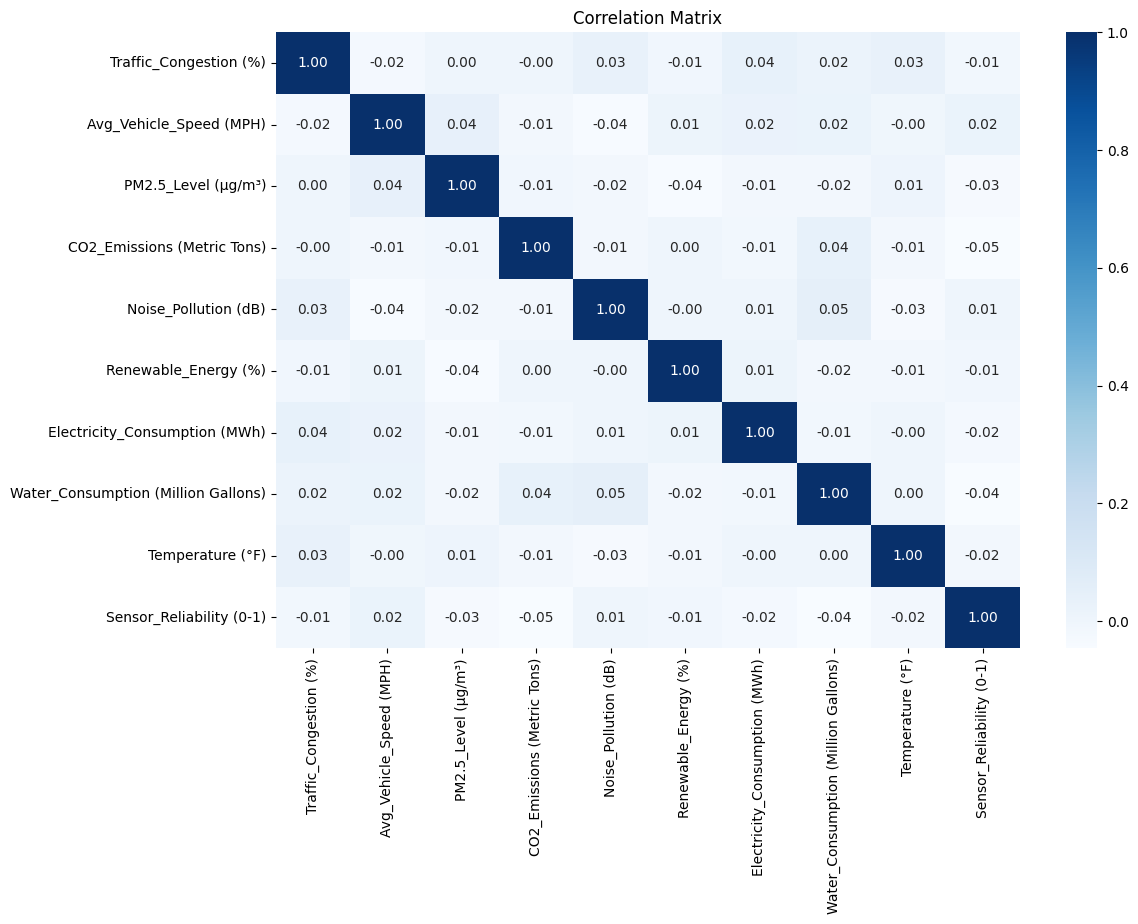

In [4]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [5]:
#PERFORMING DATA TRANSFROMATION
# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True)
df['Hour'] = df['Timestamp'].dt.hour
df['Weekday'] = df['Timestamp'].dt.day_name()

In [6]:
#DETECTING OUTLIERS
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    print(f"{column}: {len(outliers)} outliers")
    return outliers

# Run for all numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    detect_outliers_iqr(df, col)

#TRAFFIC INCIDENT THAT CAUSES THE HIGHEST AVG CONGESTION
print("\nThe traffic incident that causes the highest average congestion is:",df.groupby('Traffic_Incident')['Traffic_Congestion (%)'].mean().idxmax())

Traffic_Congestion (%): 0 outliers
Avg_Vehicle_Speed (MPH): 0 outliers
PM2.5_Level (µg/m³): 0 outliers
CO2_Emissions (Metric Tons): 0 outliers
Noise_Pollution (dB): 0 outliers
Renewable_Energy (%): 0 outliers
Electricity_Consumption (MWh): 0 outliers
Water_Consumption (Million Gallons): 0 outliers
Temperature (°F): 0 outliers
Sensor_Reliability (0-1): 0 outliers

The traffic incident that causes the highest average congestion is: Accident


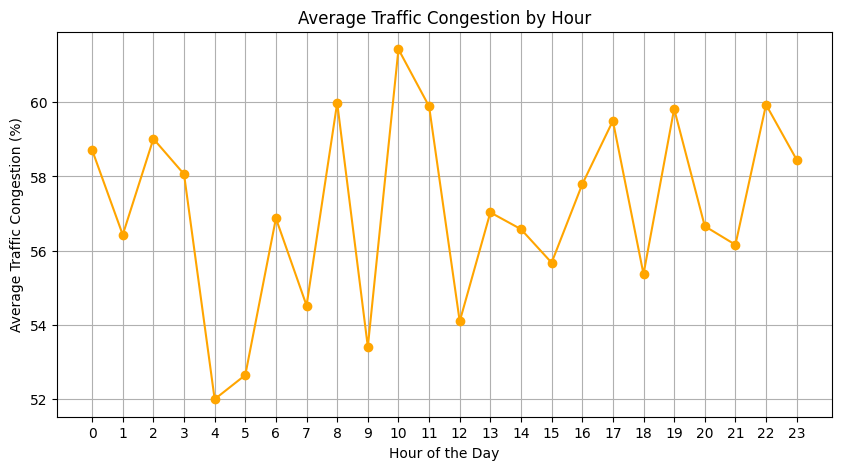

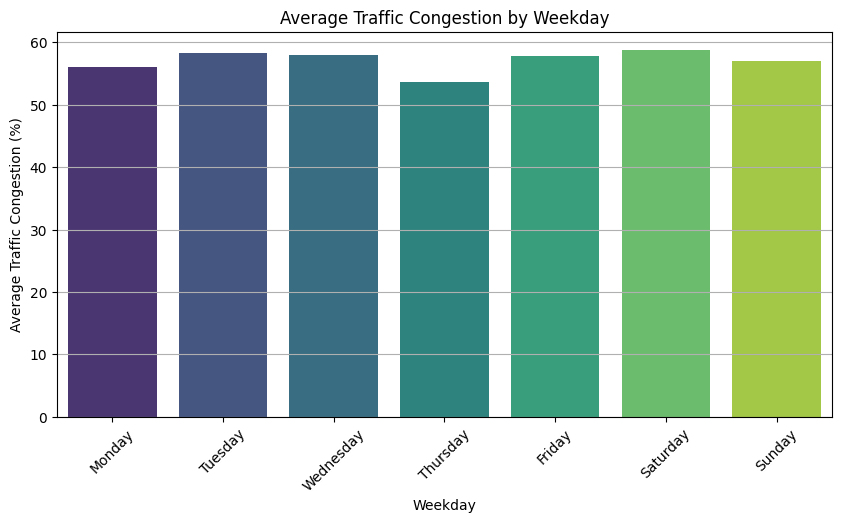

In [7]:
#VISUALIZING HOW TRAFFIC CONGESTION VARIES OVER TIME

# Grouping by Hour and calculating the mean congestion
avg_congestion_by_hour = df.groupby('Hour')['Traffic_Congestion (%)'].mean()

# Plotting the graph
plt.figure(figsize=(10, 5))
plt.plot(avg_congestion_by_hour.index, avg_congestion_by_hour.values, marker='o', color='orange')
plt.title('Average Traffic Congestion by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Congestion (%)')
plt.xticks(range(0, 24))  # Showing all 24 hours
plt.grid(True)
plt.show()

#VISUALIZING HOW TRAFFIC CONGESTION VARIES WEEKLY
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Grouping by weekday and calculating mean congestion
avg_congestion_by_weekday = df.groupby('Weekday')['Traffic_Congestion (%)'].mean().reindex(weekday_order)

# Creating a new DataFrame for plotting
plot_df = avg_congestion_by_weekday.reset_index()
plot_df.columns = ['Weekday', 'Avg_Congestion']
plt.figure(figsize=(10, 5))
sns.barplot(data=plot_df, x='Weekday', y='Avg_Congestion', palette='viridis', hue='Weekday', legend=False)
plt.title('Average Traffic Congestion by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Traffic Congestion (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


